# Potentinal Outcome Estimation Basics
In this Jupyter notebook, we will learn how to estimate a causal effect of treatment on outcome. 

In [114]:
import graphviz as gr

### Notation
To begin with, let us introduce some useful notation.<br>
$T$: observed treatment<br>
$Y$: observed outcome<br>
$do(T=t)$: intervention that sets $T$ to $t$<br>
$Y_{i}|_{do(T=t)}$: potential outcome under treatment being equal to $t$ for an individual $i$

Assume a binary treatment, i.e. $T=1$ means that treatment was taken, while $T=0$ implies it was not. Then the **causal effect** of the treatment $T$ on the outcome (e.g. health condition) of an individual $i$ is:
$$Y_{i}(1) - Y_{i}(0)$$

The fundamental problem of causal inference is that we cannot observe both $Y_{i}(1)$ and $Y_{i}(0)$ since it is not possible to take and not to take the treatment $T$ simulateneously. Therefore, we can only estimate the causal effect.

The quantity $Y_{i}(1) - Y_{i}(0)$ is called a causal effect or **individual treatment effect (ITE)**. Due to the fundamental problem of causal inference, we usually estimate the **average treatment effect (ATE)**:
$$\mathop{\mathbb{E}}[Y_{i}(1) - \mathop{\mathbb{E}}Y_{i}(0)]$$

Due to linearity of expectation, it can obviosuly be written as
$$\mathop{\mathbb{E}}[Y_{i}(1)] - \mathop{\mathbb{E}}[Y_{i}(0)]$$

One may be tempted to estimate the ATE just by taking the difference between expeteced outcomes in treatment and control groups: $\mathop{\mathbb{E}}[Y|T=1] - \mathop{\mathbb{E}}[Y|T=0]$. However, this is generally wrong because there may be other variables (**confounders**) on which we need to condition on to estimate the ATE correctly:

$$\mathop{\mathbb{E}}[Y_{i}(1) - \mathop{\mathbb{E}}Y_{i}(0)] \neq \mathop{\mathbb{E}}[Y|T=1] - \mathop{\mathbb{E}}[Y|T=0] \quad \text{(generally speaking)}$$

In fact, this is just another confirmation that **correlation does not imply causation**!


### Measuring causal effects in observational studies
Now we know that we need to adjust for a sufficient set of confounders $W$ when estimating a causal effect. This implies:
$$\mathop{\mathbb{E}}[Y(t)] = \mathop{\mathbb{E}}[Y|do(T=t)]=\mathop{\mathbb{E}}_{W}\mathop{\mathbb{E}}[Y|T=t, W]$$

That is, we have to condition on the confounders $W$ and then marginalize them out.

Consider an example where we want to estimate a causal effect of applying treatment ($T=1$) to cure some disease. 

|      |      Mild Condition   |    Severe Condition    |    Total        |
| :--- |     :----:    |    :----:      |   :----:        |
| T=0  | 70% (490/700) | 50% (50/100)   | 67.5% (540/800) |
| T=1  | 80% (200/250) | 60% (600/1000) | 64% (800/1250)  |

$\mathop{\mathbb{E}}[Y|T=0] = \dfrac{490}{800} * 70\% + \dfrac{50}{800} * 50\% = 67.5\%$<br><br>
$\mathop{\mathbb{E}}[Y|T=1] = \dfrac{200}{1250} * 80\% + \dfrac{600}{1250} * 60\% = 64\%$<br><br>
$\mathop{\mathbb{E}}[Y|T=1] - \mathop{\mathbb{E}}[Y|T=0] = -3.5\%$<br><br><br>

Let $W$ be the sufficient set of confounders, which is the health condition in our case.<br>
$\mathop{\mathbb{E}}[Y|do(T=0)] = \mathop{\mathbb{E}}_{W}\mathop{\mathbb{E}}[Y|T=0, W] = \sum_{w} \mathop{\mathbb{P}}(W=w) * \mathop{\mathbb{E}}[Y|T=0, W=w] =$<br><br>
$=\mathop{\mathbb{P}}(W=\text{mild}) * \mathop{\mathbb{E}}[Y|T=0, W=\text{mild}] + \mathop{\mathbb{P}}(W=\text{severe}) * \mathop{\mathbb{E}}[Y|T=0, W=\text{severe}]=$<br><br>
$\dfrac{690}{2050} * 70\% + \dfrac{650}{2050} * 50\% = 39.41\%$<br><br><br>

$\mathop{\mathbb{E}}[Y|do(T=1)] = \mathop{\mathbb{E}}_{W}\mathop{\mathbb{E}}[Y|T=1, W] = \sum_{w} \mathop{\mathbb{P}}(W=w) * \mathop{\mathbb{E}}[Y|T=1, W=w] =$<br><br>
$=\mathop{\mathbb{P}}(W=\text{mild}) * \mathop{\mathbb{E}}[Y|T=1, W=\text{mild}] + \mathop{\mathbb{P}}(W=\text{severe}) * \mathop{\mathbb{E}}[Y|T=1, W=\text{severe}]=$<br><br>
$\dfrac{690}{2050} * 80\% + \dfrac{650}{2050} * 60\% = 45.95\%$<br><br><br>

Causal effect (ATE): $\mathop{\mathbb{E}}[Y(1) - Y(0)] = \mathop{\mathbb{E}}[Y|do(T=1)] - \mathop{\mathbb{E}}[Y|do(T=0)] = 6.54\%$

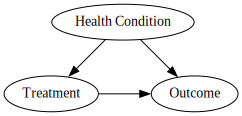

In [113]:
g = gr.Digraph(engine="neato")
g.node('Treatment',pos='0,2!')
g.node('Outcome',pos='2,2!')
g.node('Health Condition',pos='1,3!')
g.edge("Treatment", "Outcome")
g.edge("Health Condition", "Treatment")
g.edge("Health Condition", "Outcome")

g

### Proof: from causal estimand to statistical estimand

$\mathop{\mathbb{E}} [Y(1)-Y(0)] = $<br>
linearity of expectation:<br>
$= \mathop{\mathbb{E}} [Y(1)] - \mathop{\mathbb{E}}[Y(0)] = $<br>
law of iterated expectations:<br>
$= \mathop{\mathbb{E}}_{W} [\mathop{\mathbb{E}} [Y(1)] - \mathop{\mathbb{E}}[Y(0)] | W] = \mathop{\mathbb{E}}_{W} [\mathop{\mathbb{E}} [Y(1)|W] - \mathop{\mathbb{E}}[Y(0)|W]]= $<br>
unconfoundedness (Y(0) and Y(1) are independent of T) and positivity:<br>
$=\mathop{\mathbb{E}}_{W} [\mathop{\mathbb{E}} [Y(1)|T=1, W] - \mathop{\mathbb{E}}[Y(0)|T=0,W]]$<br>
consistency(Y(t)|t = Y|t):<br>
$=\mathop{\mathbb{E}}_{W} [\mathop{\mathbb{E}} [Y|T=1, W] - \mathop{\mathbb{E}}[Y|T=0,W]] = \mathop{\mathbb{E}}_{W} [\mathop{\mathbb{E}} [Y|T=1, W]] - \mathop{\mathbb{E}}_{W}[\mathop{\mathbb{E}}[Y|T=0,W]]$

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Estimating the causal effect of sodium on blood pressure in a simulated example
adapted from Luque-Fernandez et al. (2018): https://academic.oup.com/ije/article/48/2/640/5248195.

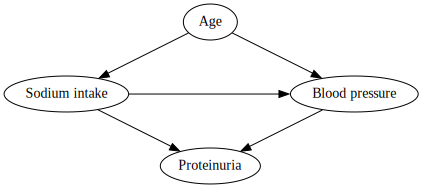

In [129]:
bp_graph = gr.Digraph(engine="neato")
bp_graph.node('Age',pos='1,3!')
bp_graph.node('Sodium intake',pos='-1,2!')
bp_graph.node('Blood pressure',pos='3,2!')
bp_graph.node("Proteinuria",pos='1,1!')
bp_graph.edge("Age", "Sodium intake")
bp_graph.edge("Age", "Blood pressure")
bp_graph.edge("Sodium intake", "Blood pressure")
bp_graph.edge("Sodium intake", "Proteinuria")
bp_graph.edge("Blood pressure", "Proteinuria")

bp_graph

In [131]:
def generate_data(
        n: int = 1000, seed: int = 0, beta1: float = 1.05, alpha1: float = 0.4, alpha2: float = 0.3,
        binary_treatment: bool = True, binary_cutoff: float = 3.5
    ) -> pd.DataFrame:
    """
    Generate data according to the following causal graph:
                   Age
                 /     \ 
                /       \ 
               v         v
    Sodium intake -------> Blood pressure
              \            /
               \          /
                v        v
               Proteinuria
    Proteinuria is a collider and must not be conditioned on!

    :param n: number of data points
    :param seed: random seed
    :param beta1: beta1 coefficient
    :param alpha1: alpha1 coefficient
    :param alpha2: alpha2 coefficient
    :param binary_treatment: whether to treat the treatment as binary
    :param binary_cutoff: the binary threshold
    :returns: dataframe with generated data
    """
    
    # Covariate generation
    np.random.seed(seed)
    age = np.random.normal(65, 5, n)
    sodium = age / 18 + np.random.normal(size=n)
    if binary_treatment:
        if binary_cutoff is None:
            binary_cutoff = sodium.mean()
        sodium = (sodium > binary_cutoff).astype(int)
    blood_pressure = beta1 * sodium + 2 * age + np.random.normal(size=n)
    proteinuria = alpha1 * sodium + alpha2 * blood_pressure + np.random.normal(size=n)
    # hypertension = (blood_pressure >= 140).astype(int)  # not used, but could be used for binary outcomes
    return pd.DataFrame(
        {'blood_pressure': blood_pressure, 'sodium': sodium, 'age': age, 'proteinuria': proteinuria}
    )


def estimate_causal_effect(Wt, y, model: callable = LinearRegression(), treatment_idx: int = 0, regression_coef: bool = False) -> float:
    """
    Estimate a causal effect.
    
    :param Wt: sufficient confounder set and treatment
    :param y: outcome
    :param model:
    :param treatment_idx: alpha1 coefficient
    :param alpha2: alpha2 coefficient
    :param regression_coef: whether to treat the treatment as binary
    :returns: causal effect estimate
    """
    model.fit(Wt, y)
    if regression_coef:
        return model.coef_[treatment_idx]
    
    Wt1 = pd.DataFrame.copy(Wt)  # create a dataframe with treatment values of 1
    Wt1[Wt.columns[treatment_idx]] = 1
    Wt0 = pd.DataFrame.copy(Wt)  # # create a dataframe with treatment values of 0
    Wt0[Wt.columns[treatment_idx]] = 0
    return (model.predict(Wt1) - model.predict(Wt0)).mean() # estimation step

In [132]:
binary_t_df = generate_data(beta1=1.05, alpha1=.4, alpha2=.3, binary_treatment=True, n=10000000)
continuous_t_df = generate_data(beta1=1.05, alpha1=.4, alpha2=.3, binary_treatment=False, n=10000000)

### Binary estimation
$y_{i} = \alpha t_i + W_i\beta$ <br><br>

Regression coefficient method: $\alpha$ <br>


Adjustment formula:<br>
$\bar{y}^{(1)} = \alpha + {\bar{W}}^T \beta$<br>
$\bar{y}^{(0)} = \bar{W}^T \beta$<br>
$\bar{y}^{(1)} - \bar{y}^{(0)} = \alpha + {\bar{W}}^T \beta - \bar{W}^T \beta = \alpha$

#### Naive (undercontrol)

In [134]:
ate_est_naive = estimate_causal_effect(binary_t_df[['sodium']], binary_t_df['blood_pressure'], treatment_idx=0)
print('Naive ATE estimate:', round(ate_est_naive, 2))

Naive ATE estimate: 5.33


#### Overcontrol

In [136]:
ate_est_adjust_all = estimate_causal_effect(
    binary_t_df[['sodium', 'age', 'proteinuria']], binary_t_df['blood_pressure'], treatment_idx=0
)
print('ATE estimate adjusting for all covariates:', round(ate_est_adjust_all, 2))

ATE estimate adjusting for all covariates: 0.85


#### Correct causal effect estimation

In [138]:
ate_est_adjust_age = estimate_causal_effect(binary_t_df[['sodium', 'age']], binary_t_df['blood_pressure'])  # correct estimation
print('ATE estimate adjusting for age:', round(ate_est_adjust_age, 2))

ATE estimate adjusting for age: 1.05


In [139]:
# Linear regression coefficient estimates
ate_est_naive = estimate_causal_effect(
    binary_t_df[['sodium']], binary_t_df['blood_pressure'], treatment_idx=0, regression_coef=True
)
ate_est_adjust_all = estimate_causal_effect(
    binary_t_df[['sodium', 'age', 'proteinuria']], binary_t_df['blood_pressure'], treatment_idx=0, regression_coef=True
)
ate_est_adjust_age = estimate_causal_effect(
    binary_t_df[['sodium', 'age']], binary_t_df['blood_pressure'], regression_coef=True
)
print('# Regression Coefficient Estimates #')
print('Naive ATE estimate:\t\t\t\t', round(ate_est_naive, 2))
print('ATE estimate adjusting for all covariates:\t', round(ate_est_adjust_all, 2))
print('ATE estimate adjusting for age:\t\t\t', round(ate_est_adjust_age, 2))

# Regression Coefficient Estimates #
Naive ATE estimate:				 5.33
ATE estimate adjusting for all covariates:	 0.85
ATE estimate adjusting for age:			 1.05


#### Continuous treatment

In [140]:
ate_est_naive = None
ate_est_adjust_all = None
ate_est_adjust_age = None

# Adjustment formula estimates
ate_est_naive = estimate_causal_effect(continuous_t_df[['sodium']], continuous_t_df['blood_pressure'], treatment_idx=0)
ate_est_adjust_all = estimate_causal_effect(
    continuous_t_df[['sodium', 'age', 'proteinuria']], continuous_t_df['blood_pressure'], treatment_idx=0
)
ate_est_adjust_age = estimate_causal_effect(continuous_t_df[['sodium', 'age']], continuous_t_df['blood_pressure'])  # correct estimation
print('# Adjustment Formula Estimates #')
print('Naive ATE estimate:\t\t\t\t', round(ate_est_naive, 2))
print('ATE estimate adjusting for all covariates:\t', round(ate_est_adjust_all, 2))
print('ATE estimate adjusting for age:\t\t\t', round(ate_est_adjust_age, 2))
print()

# Linear regression coefficient estimates
ate_est_naive = estimate_causal_effect(
    continuous_t_df[['sodium']], continuous_t_df['blood_pressure'], treatment_idx=0, regression_coef=True
)
ate_est_adjust_all = estimate_causal_effect(
    continuous_t_df[['sodium', 'age', 'proteinuria']], continuous_t_df['blood_pressure'], treatment_idx=0, regression_coef=True
)
ate_est_adjust_age = estimate_causal_effect(
    continuous_t_df[['sodium', 'age']], continuous_t_df['blood_pressure'], regression_coef=True
)
print('# Regression Coefficient Estimates #')
print('Naive ATE estimate:\t\t\t\t', round(ate_est_naive, 2))
print('ATE estimate adjusting for all covariates:\t', round(ate_est_adjust_all, 2))
print('ATE estimate adjusting for age:\t\t\t', round(ate_est_adjust_age, 2))

# Adjustment Formula Estimates #
Naive ATE estimate:				 3.63
ATE estimate adjusting for all covariates:	 0.85
ATE estimate adjusting for age:			 1.05

# Regression Coefficient Estimates #
Naive ATE estimate:				 3.63
ATE estimate adjusting for all covariates:	 0.85
ATE estimate adjusting for age:			 1.05


NB: A limitation of this approach is the fact that we assume a linear parametrics form -> the causal effect estimate is the same for all individuals!